<a href="https://colab.research.google.com/github/Ivano05/prediccion-de-numeros/blob/main/prediccion_de_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging


In [3]:
logger = tf.get_logger()

In [4]:
logger.setLevel(logging.ERROR)

In [5]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [7]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [18]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [10]:
#Normalizacion de los numeros para que sean de 0 a 1 y no de 0 a 255 que son los pixeles
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [11]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [14]:
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

In [15]:
model.fit(
    train_dataset, epochs=5,
    steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE)
)

Epoch 1/5
313/313 [==============================] - 4s 6ms/step - loss: 0.5977 - accuracy: 0.8267
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2690 - accuracy: 0.9196
Epoch 3/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2368 - accuracy: 0.9311
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2108 - accuracy: 0.9374
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1840 - accuracy: 0.9485


In [19]:
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples/32)
)

313/313 [==============================] - 2s 5ms/step - loss: 0.1601 - accuracy: 0.9533


1/1 [==============================] - 0s 26ms/step


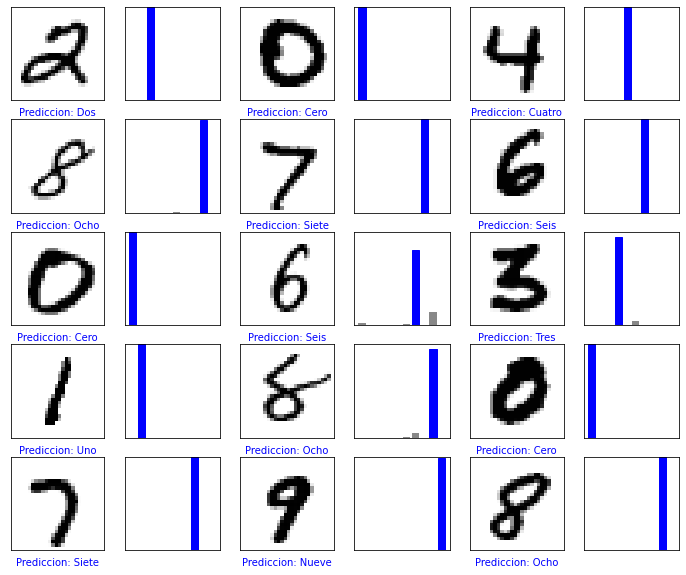

In [54]:
for test_images, test_labels in test_dataset.take(1):
        test_images = test_images.numpy()
        test_labels = test_labels.numpy()
        predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
        predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        plt.imshow(img[...,0], cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions_array)
        if predicted_label == true_label:
                color = 'blue'
        else:
                color = 'red'

        plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
        predictions_array, true_label = predictions_array[i], true_label[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#888888")
        plt.ylim([0,1])
        predicted_label = np.argmax(predictions_array)

        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
        plt.subplot(numrows, 2*numcols, 2*i+1)
        plot_image(i, predictions, test_labels, test_images)
        plt.subplot(numrows, 2*numcols, 2*i+2)
        plot_value_array(i, predictions, test_labels)

plt.show()





